In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from transformers import AutoModelForCausalLM

from gptomics import gptneo, transformers, composition as comp

# Automatically rounding outputs to 4 digits
np.set_printoptions(precision=4)

In [2]:
model = transformers.load_model("EleutherAI/gpt-neo-125M")

In [3]:
df = pd.read_csv("../data/220428_gptneo_125M_contribweights.csv", index_col=0)

In [4]:
df.shape

(41668, 8)

In [5]:
df.head()

,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,contrib_type,value
0,att_head,0,0,mlp_weight,0,0,mlp,0.033481
1,att_head,0,0,head,1,0,Q,0.063658
2,att_head,0,0,head,1,0,K,0.061614
3,att_head,0,0,head,1,0,V,0.026479
4,att_head,0,0,head,1,1,Q,0.041288


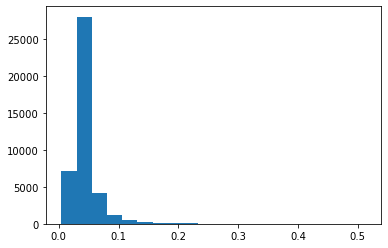

In [6]:
plt.hist(df["value"], bins=20)
plt.show()

In [7]:
df[df.value == df.value.max()]

,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,contrib_type,value
17256,att_bias,2,11,head,3,3,K,0.513139


In [8]:
df.sort_values("value", ascending=False)

,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,contrib_type,value
17256,att_bias,2,11,head,3,3,K,0.513139
12173,mlp_bias,1,0,head,3,3,K,0.509260
17922,mlp_bias,2,0,head,3,3,K,0.476849
17277,att_bias,2,11,head,3,10,K,0.469109
12194,mlp_bias,1,0,head,3,10,K,0.463197
...,...,...,...,...,...,...,...,...
6969,att_head,1,0,head,2,11,V,0.005202
6966,att_head,1,0,head,2,10,V,0.005044
6957,att_head,1,0,head,2,7,V,0.004638
6963,att_head,1,0,head,2,9,V,0.004475


In [13]:
att_only = df[(df.src_type == "att_head")
              & (df.dst_type == "head")]

In [16]:
pd.unique(df.src_type)

array(['att_head', 'att_bias', 'mlp_weight', 'mlp_bias',
       'layernorm_bias1', 'layernorm_bias2'], dtype=object)

In [14]:
att_only.sort_values("value", ascending=False)

,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,contrib_type,value
9207,att_head,1,6,head,3,3,K,0.424473
9222,att_head,1,6,head,3,8,K,0.379032
9228,att_head,1,6,head,3,10,K,0.378153
6981,att_head,1,0,head,3,3,K,0.365302
9278,att_head,1,6,head,5,2,K,0.353744
...,...,...,...,...,...,...,...,...
6969,att_head,1,0,head,2,11,V,0.005202
6966,att_head,1,0,head,2,10,V,0.005044
6957,att_head,1,0,head,2,7,V,0.004638
6963,att_head,1,0,head,2,9,V,0.004475


In [32]:
from collections import Counter
Counter(att_only.src_layer)

Counter({0: 4752,
         1: 4320,
         2: 3888,
         3: 3456,
         4: 3024,
         5: 2592,
         6: 2160,
         7: 1728,
         8: 1296,
         9: 864,
         10: 432})

In [27]:
att_only.sort_values("value", ascending=False).head(25000)

,src_type,src_layer,src_index,dst_type,dst_layer,dst_index,contrib_type,value
9207,att_head,1,6,head,3,3,K,0.424473
9222,att_head,1,6,head,3,8,K,0.379032
9228,att_head,1,6,head,3,10,K,0.378153
6981,att_head,1,0,head,3,3,K,0.365302
9278,att_head,1,6,head,5,2,K,0.353744
...,...,...,...,...,...,...,...,...
2162,att_head,0,5,head,4,3,K,0.028284
39137,att_head,8,11,head,10,5,Q,0.028282
41397,att_head,10,9,head,11,9,V,0.028282
39159,att_head,8,11,head,11,0,Q,0.028281


In [30]:
u, s, vt = np.linalg.svd(np.eye(5))

In [31]:
s

array([1., 1., 1., 1., 1.])